In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

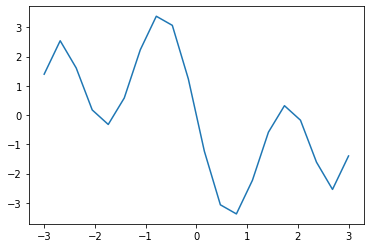

In [6]:
def f(x):
    return (x**2-4)*np.sin(2*x)

N=20
X=np.linspace(-3,3,N)
y = f(X)

plt.plot(X,y)

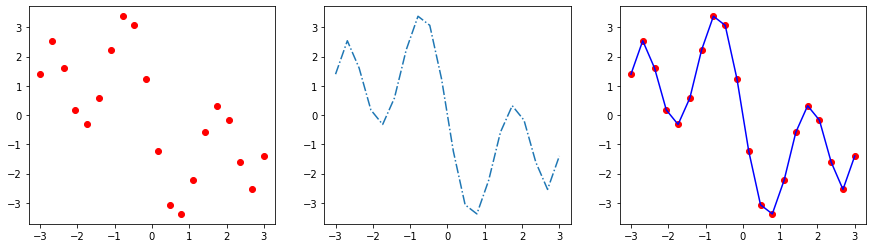

In [7]:
fig, axes = plt.subplots(figsize=(15,4), nrows=1, ncols=3, sharex='col')
axes[0].scatter(X, y, c='r')
axes[1].plot(X,y, '-.')
axes[2].scatter(X,y,c='r')
axes[2].plot(X,y, c='b')

In [8]:
print(type(X), type(y))
print(np.shape(X), np.shape(y))
print("All x: ", X)
print("First 4", X[:4])
print("Last 4", X[-4:])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20,) (20,)
All x:  [-3.         -2.68421053 -2.36842105 -2.05263158 -1.73684211 -1.42105263
 -1.10526316 -0.78947368 -0.47368421 -0.15789474  0.15789474  0.47368421
  0.78947368  1.10526316  1.42105263  1.73684211  2.05263158  2.36842105
  2.68421053  3.        ]
First 4 [-3.         -2.68421053 -2.36842105 -2.05263158]
Last 4 [2.05263158 2.36842105 2.68421053 3.        ]


In [9]:
# Dot product
np.random.seed(5)
vectors = np.random.normal(0, 5.0, (2, 1000))
np.shape(vectors)

def dot_for_loop(vecs):
    dotproduct = 0
    dim = np.shape(vecs)[1]
    for j in range(dim):
        dotproduct += vecs[0][j]*vecs[1][j]
    return dotproduct

def dot_with_np(vecs):
    dim = np.shape(vecs)[1]
    return np.dot(vecs[0], vecs[1])

In [10]:
%%timeit
dot_for_loop(vectors)

3.64 ms ± 76.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
dot_with_np(vectors)

# Np dot product much faster!

12 µs ± 2.01 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


x=  [-1.  0.  1.] y=  [ 3.8315865   0.71527897 -4.04540029] noise added= [ 1.3315865   0.71527897 -1.54540029]


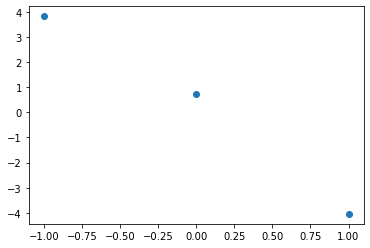

In [12]:
def linear_simple(x):
    return -2.5*x

# Linear Regression
Xtrain1 = np.linspace(-1,1,3)
# a seed makes sure that rerunning yields the same result
np.random.seed(10)
n3 = np.random.normal(0,1.0,3)
ytrain1= linear_simple(Xtrain1) + n3
print("x= ", Xtrain1, "y= ", ytrain1, "noise added=", n3)
plt.scatter(Xtrain1,ytrain1)

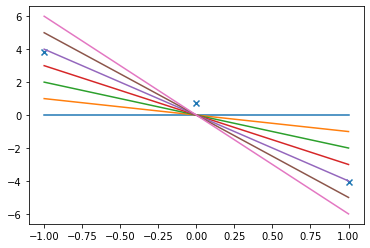

In [13]:
plt.scatter(Xtrain1,ytrain1, marker='x')
wlist = np.asarray([0.,-1.,-2.,-3.,-4.,-5.,-6.])
X = np.linspace(-1, 1, 2)
for i in range(len(wlist)):
    plt.plot(X, wlist[i]*X)

In [14]:
# Residuals
for i in range(len(wlist)):
    print("w=", wlist[i])
    print(wlist[i]*Xtrain1-ytrain1)

w= 0.0
[-3.8315865  -0.71527897  4.04540029]
w= -1.0
[-2.8315865  -0.71527897  3.04540029]
w= -2.0
[-1.8315865  -0.71527897  2.04540029]
w= -3.0
[-0.8315865  -0.71527897  1.04540029]
w= -4.0
[ 0.1684135  -0.71527897  0.04540029]
w= -5.0
[ 1.1684135  -0.71527897 -0.95459971]
w= -6.0
[ 2.1684135  -0.71527897 -1.95459971]


In [15]:
# loss function
for i in range(len(wlist)):
    print(np.sum((wlist[i]*Xtrain1-ytrain1)**2))

31.557942673257834
17.803969080776263
8.049995488294687
2.296021895813113
0.5420483033315401
2.7880747108499664
9.034101118368394


In [16]:
# MSE
def mse(w, x, y):
    return np.mean((np.multiply(w,x)-y)**2)
def rmse(w,x,y):
    return np.sqrt(np.mean((np.multiply(w,x)-y)**2))

print("MSE")
for i in range(len(wlist)):
    print(mse(wlist[i],Xtrain1,ytrain1))

print("RMSE")
for i in range(len(wlist)):
    print(rmse(wlist[i],Xtrain1,ytrain1))

MSE
10.519314224419277
5.934656360258754
2.6833318294315625
0.7653406319377044
0.18068276777718004
0.9293582369499888
3.011367039456131
RMSE
3.2433492294878263
2.436115013758331
1.6380878576656266
0.8748374888730504
0.4250679566577326
0.9640322800352635
1.7353290867890536


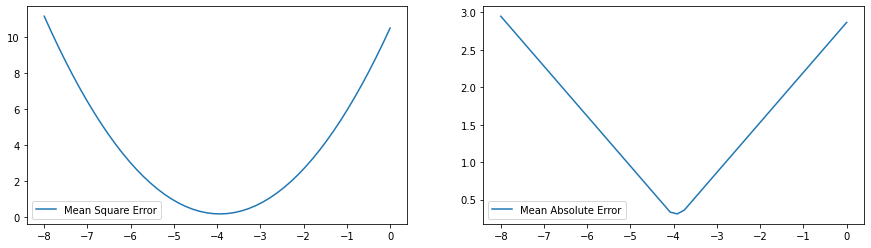

In [17]:
def ar_mse(w,x,y):
    return np.array([np.mean((np.multiply(wi,x)-y)**2) for wi in w])
def ar_l1e(w, x, y):
    return np.array([np.mean(np.abs(np.multiply(wi,x)-y)) for wi in w])

wlims = np.linspace(-8,0,50)
fig, axes = plt.subplots(figsize=(15,4), nrows=1, ncols=2)
axes[0].plot(wlims,ar_mse(wlims,Xtrain1, ytrain1), label='Mean Square Error')
axes[0].legend()
axes[1].plot(wlims,ar_l1e(wlims,Xtrain1, ytrain1), label='Mean Absolute Error')
axes[1].legend()

In [18]:
wbest = wlims[np.argmin(ar_mse(wlims,Xtrain1, ytrain1))]
least_error = np.min(ar_mse(wlims,Xtrain1, ytrain1))

print(wbest, least_error)

-3.9183673469387754 0.1784307650181058


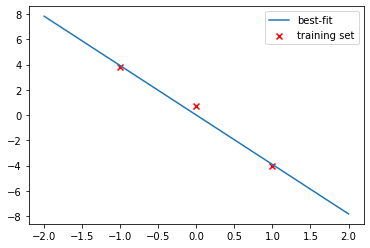

In [19]:
X = np.linspace(-2,2,50)
plt.plot(X,wbest*X, label='best-fit')
plt.scatter(Xtrain1,ytrain1,c='r',marker='x', label='training set')
plt.legend()

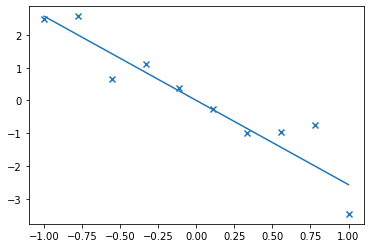

In [20]:
ws = np.linspace(-6,2,50)
Xtrain2 = np.linspace(-1,1,10)
ytrain2 = linear_simple(Xtrain2) + np.random.normal(0,1.0,10)

plt.scatter(Xtrain2, ytrain2, marker='x',label='data')
plt.plot(Xtrain2, ws[np.argmin(ar_mse(ws, Xtrain2, ytrain2))]*Xtrain2, label='best fit')

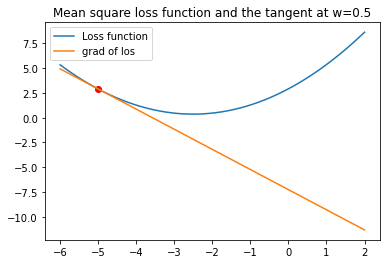

In [21]:
plt.plot(ws,ar_mse(ws, Xtrain2, ytrain2), label='Loss function')
plt.scatter([-5.],ar_mse([-5.],Xtrain2, ytrain2),c='r')

def loss_slope_w1(w1, Xtrain, ytrain):
    return (2/len(Xtrain))*(np.dot(w1*Xtrain - ytrain, Xtrain))

gw = loss_slope_w1(-5.0, Xtrain2, ytrain2)
loss = mse(-5., Xtrain2, ytrain2)
plt.plot(ws,gw*(ws+5.) + loss, label='grad of los')
plt.title('Mean square loss function and the tangent at w=0.5')
plt.legend()

In [22]:
def gradientdescent0(initialweight, X, y, rate, numiter):
    whistory = []
    msehistory = []
    w = initialweight
    for i in range(numiter):
        loss = mse(w, X, y)
        whistory.append(w)
        msehistory.append(loss)
        grad = loss_slope_w1(w, X, y)
        w = w - rate*grad  # go a certain distance opposite to the slope (downward)
    return w, np.asarray(whistory), np.asarray(msehistory)

print('numiter = 1:\n', gradientdescent0(-5., Xtrain2, ytrain2, .2, 1))
print('numiter = 2:\n', gradientdescent0(-5., Xtrain2, ytrain2, .2, 2))
print('numiter = 3:\n', gradientdescent0(-5., Xtrain2, ytrain2, .2, 3))

numiter = 1:
 (-4.593469305108663, array([-5.]), array([2.8936971]))
numiter = 2:
 (-4.25318805679221, array([-5.        , -4.59346931]), array([2.8936971 , 2.13469215]))
numiter = 3:
 (-3.9683600489421416, array([-5.        , -4.59346931, -4.25318806]), array([2.8936971 , 2.13469215, 1.60290976]))


67.00682561347962


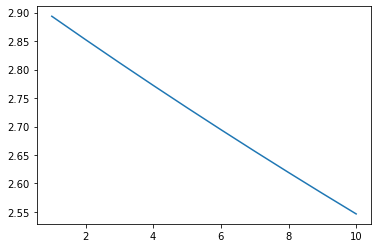

In [57]:
numiter=10
descentX = np.linspace(1,numiter,numiter)
descent = gradientdescent0(-5,Xtrain2,ytrain2,.01,numiter)
print(loss_slope_w1(1.25,descentX,descent[2]))
plt.plot(descentX, descent[2])

In [ ]:
def linear_fit(X,y):
    num = (X*y).mean() - (X.mean()*y.mean())
    den = (X**2).mean() - (X.mean())**2
    w1 = num/den
    w0 = y.mean() - w1*X.mean()
    return w0, w1